<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [347]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [348]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [349]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [350]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.

def plot_clusters(df, name):
    plt.figure()
    ax = sns.scatterplot(
        x = 'x',
        y = 'y',
        data = df,
        hue = 'label'
    )
    ax.set_title(f'Dataframe: {name}')
    ax.set_xlabel("X-Axis", fontsize = 20)
    ax.set_ylabel("Y-Axis", fontsize = 20)

In [351]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

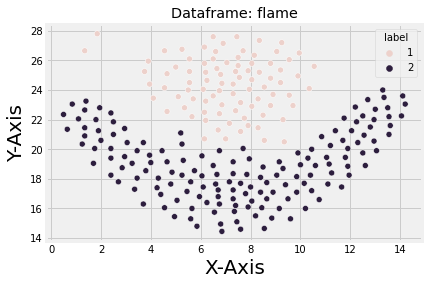

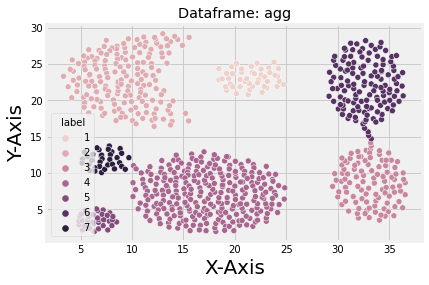

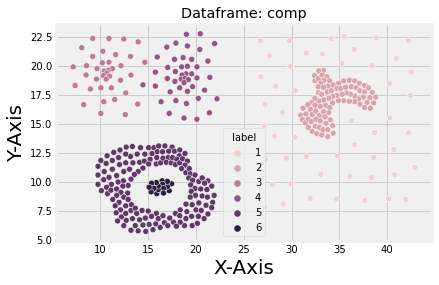

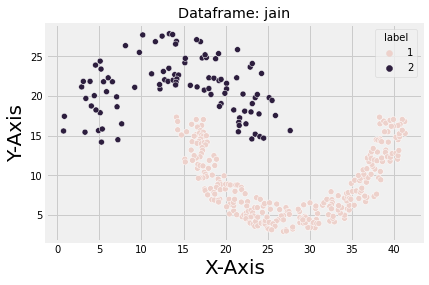

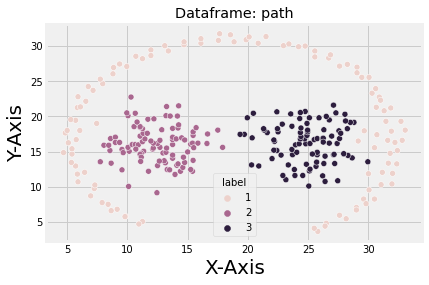

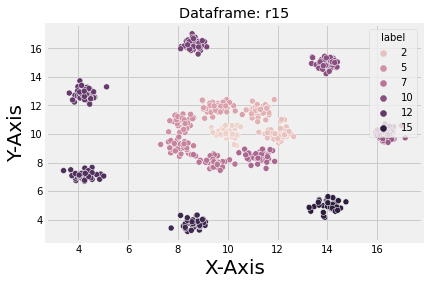

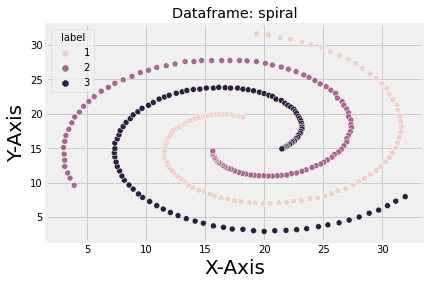

In [352]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs];

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [353]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

Ans: Because we need to standardize the distance between each points.

In [354]:
# Write your function to scale data here.
def scale_matrix(X):
    ss = StandardScaler()
    return ss.fit_transform(X)

In [355]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate coloring

def plot_results(df, cl):
    # Scale data
    X_scaled = scale_matrix(df[['x','y']])
    # Fit clusterer
    cl.fit(X_scaled)

    # Print Silhouette Score
    name = str(cl)
    score = silhouette_score(X_scaled, cl.labels_)

    print(f'{name} score: {score}')
    
    # Plot
    df_cluster = df.copy()
    df_cluster['cluster'] = cl.labels_  


    plt.figure()
    ax = sns.scatterplot(
        x = 'x',
        y = 'y',
        data = df_cluster,
        hue = 'cluster'
    )
    ax.set_title(f'{name}, Score: {score}')


    

## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

DBSCAN(eps=0.3) score: 0.25624333845853214


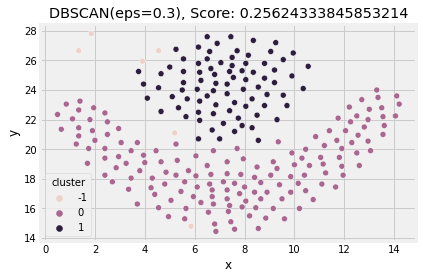

In [356]:
# A: KM means has a better score
dbscan = DBSCAN(eps = 0.3)
km = KMeans(n_clusters=2, random_state=42)


plot_results(flame,dbscan)

KMeans(n_clusters=2, random_state=42) score: 0.3733173841508355


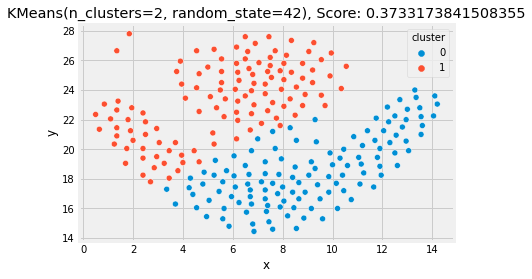

In [357]:
plot_results(flame,km)

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

DBSCAN(eps=0.35, min_samples=4) score: 0.44888631766542825


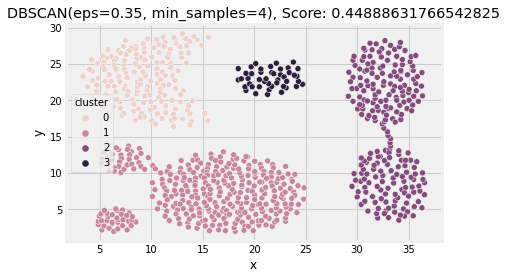

In [358]:
# A:
dbscan = DBSCAN(eps = 0.35, min_samples= 4)
km = KMeans(n_clusters=4, random_state=42)

plot_results(agg,dbscan)

KMeans(n_clusters=4, random_state=42) score: 0.5365827183828406


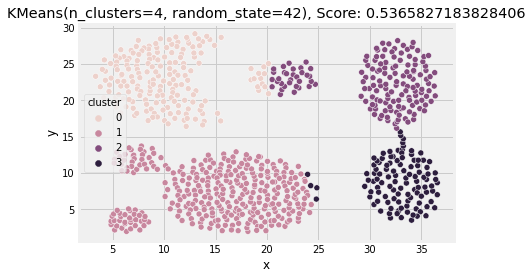

In [359]:
plot_results(agg,km)

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

DBSCAN(eps=0.45, min_samples=4) score: 0.6007215793981607


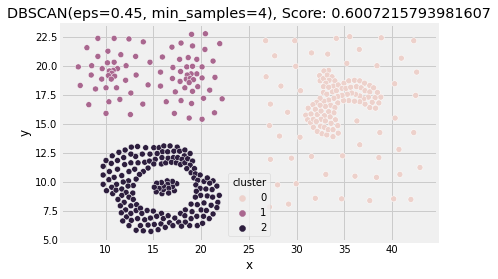

In [360]:
# A:
dbscan = DBSCAN(eps = 0.45, min_samples= 4)


plot_results(comp,dbscan)

KMeans(n_clusters=3, random_state=42) score: 0.6061568110083521


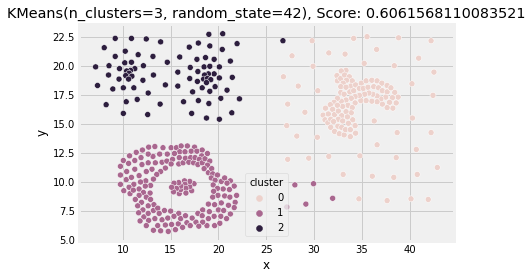

In [361]:
km = KMeans(n_clusters=3, random_state=42)
plot_results(comp,km)

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

DBSCAN(eps=0.3) score: 0.3480970912583266
DBSCAN(eps=0.3022222222222222) score: 0.3480970912583266
DBSCAN(eps=0.30444444444444446) score: 0.3480970912583266
DBSCAN(eps=0.30666666666666664) score: 0.32293235790786196
DBSCAN(eps=0.3088888888888889) score: 0.32293235790786196
DBSCAN(eps=0.3111111111111111) score: 0.32293235790786196
DBSCAN(eps=0.31333333333333335) score: 0.3670137649915955
DBSCAN(eps=0.31555555555555553) score: 0.3670137649915955
DBSCAN(eps=0.31777777777777777) score: 0.18951277330954835
DBSCAN(eps=0.32) score: 0.18951277330954835


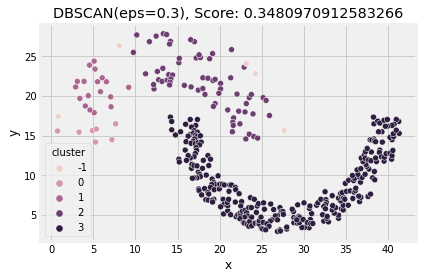

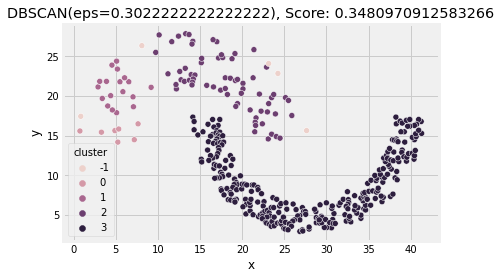

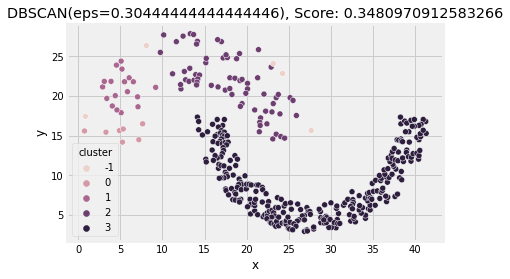

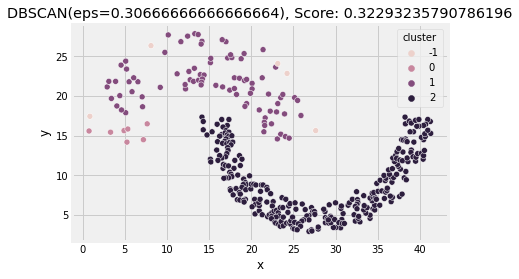

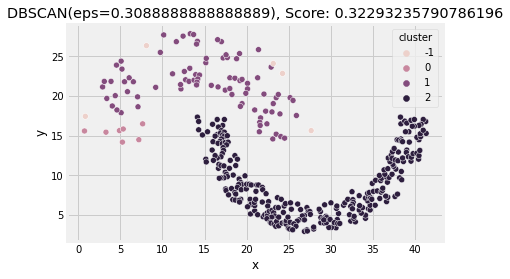

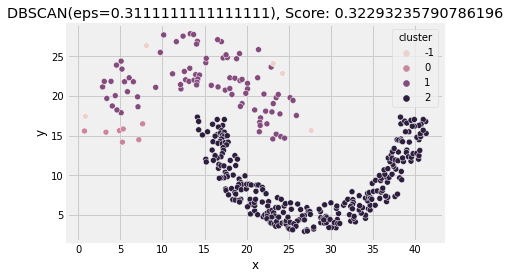

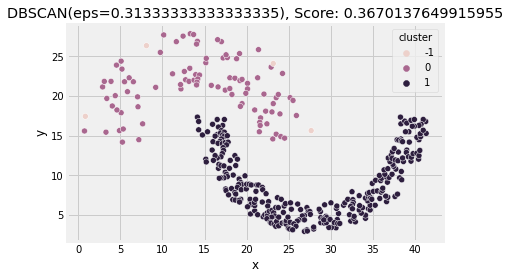

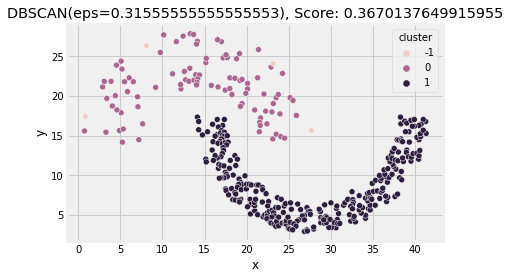

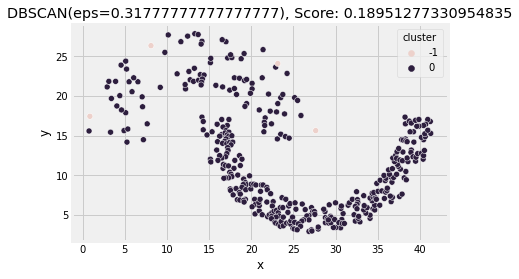

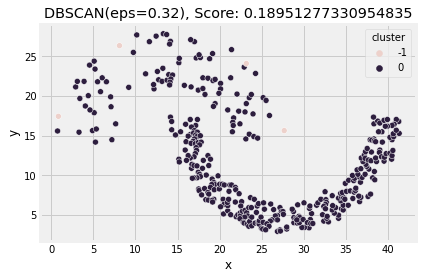

In [362]:
for i in np.linspace(0.3,0.32,10):
    dbscan = DBSCAN(eps = i, min_samples= 5)
    plot_results(jain,dbscan)

KMeans(n_clusters=2, random_state=42) score: 0.5044779516212523


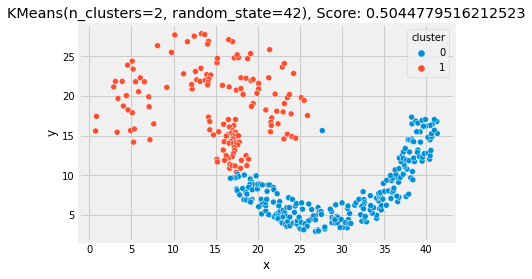

In [363]:
# A:
km = KMeans(n_clusters=2, random_state=42)
plot_results(jain,km)

In [364]:
# A:

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

In [365]:
# A:

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

DBSCAN(eps=0.2) score: 0.653006125666107
DBSCAN(eps=0.23333333333333334) score: 0.653006125666107
DBSCAN(eps=0.26666666666666666) score: 0.653006125666107
DBSCAN(eps=0.30000000000000004) score: 0.653006125666107
DBSCAN(eps=0.33333333333333337) score: 0.653006125666107
DBSCAN(eps=0.3666666666666667) score: 0.653006125666107
DBSCAN(eps=0.4) score: 0.653006125666107
DBSCAN(eps=0.43333333333333335) score: 0.653006125666107
DBSCAN(eps=0.4666666666666667) score: 0.653006125666107
DBSCAN() score: 0.653006125666107


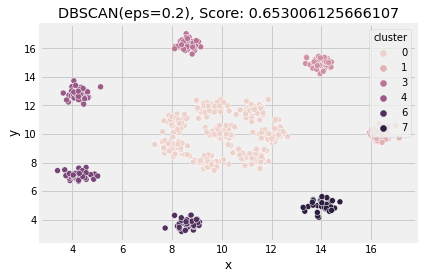

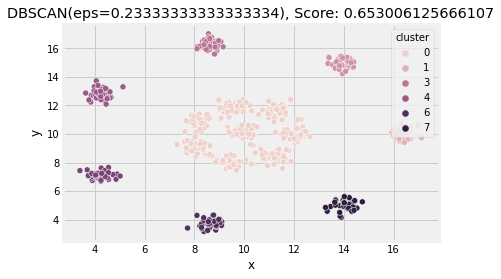

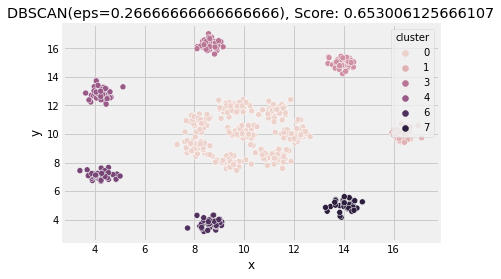

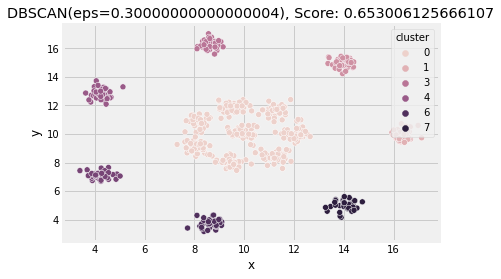

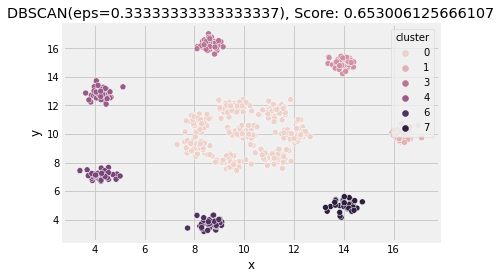

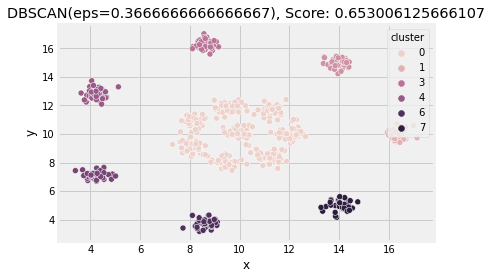

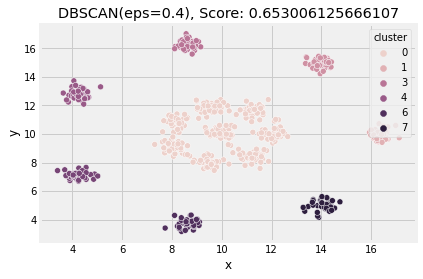

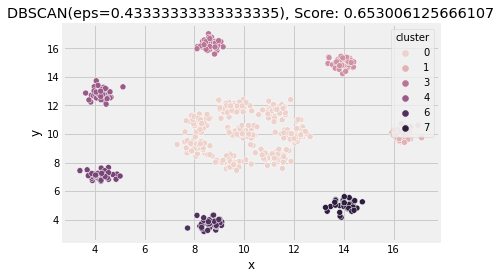

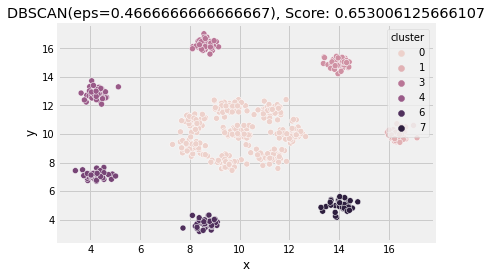

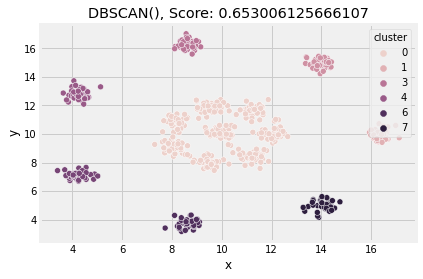

In [366]:
# A:
for i in np.linspace(0.2,0.5,10):
    dbscan = DBSCAN(eps = i, min_samples= 5)
    plot_results(r15,dbscan)

KMeans(random_state=42) score: 0.653006125666107


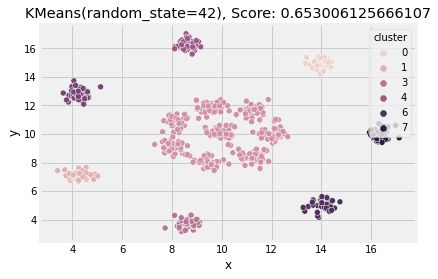

In [367]:
# A:
km = KMeans(n_clusters=8, random_state=42)
plot_results(r15,km)

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

DBSCAN(eps=0.3, min_samples=2) score: 0.001393007226841032


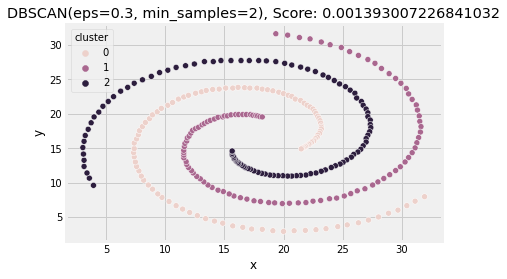

In [368]:
# A:
dbscan = DBSCAN(eps = 0.3, min_samples= 2)
plot_results(spiral,dbscan)

KMeans(n_clusters=3, random_state=42) score: 0.3619014060866812


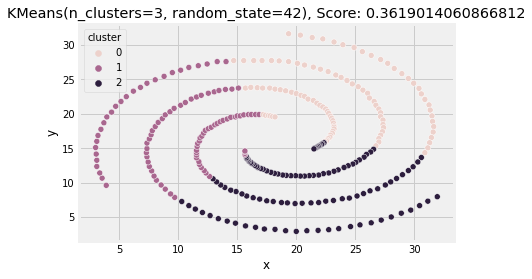

In [369]:
# A:
km = KMeans(n_clusters=3, random_state=42)
plot_results(spiral,km)

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [370]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [371]:
mel.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [372]:
rename_list = [word.lower() for word in mel.columns]

mel.columns = rename_list

In [373]:
mel.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [374]:
mel.dropna(inplace = True, subset = ['lattitude', 'longtitude', 'price'])

### 5c) Plot lat vs long
What kind of clustering do you want to do?

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

To standardize the distance of points close to each other

### 5e) Cluster and plot clusters

In [375]:
mel = mel[['price', 'lattitude','longtitude']]

In [376]:
mel

,price,lattitude,longtitude
1,1480000.0,-37.79960,144.99840
2,1035000.0,-37.80790,144.99340
4,1465000.0,-37.80930,144.99440
5,850000.0,-37.79690,144.99690
6,1600000.0,-37.80720,144.99410
...,...,...,...
34851,1101000.0,-37.81095,144.88516
34852,1480000.0,-37.81053,144.88467
34853,888000.0,-37.81551,144.88826
34854,705000.0,-37.82286,144.87856


<AxesSubplot:xlabel='longtitude', ylabel='lattitude'>

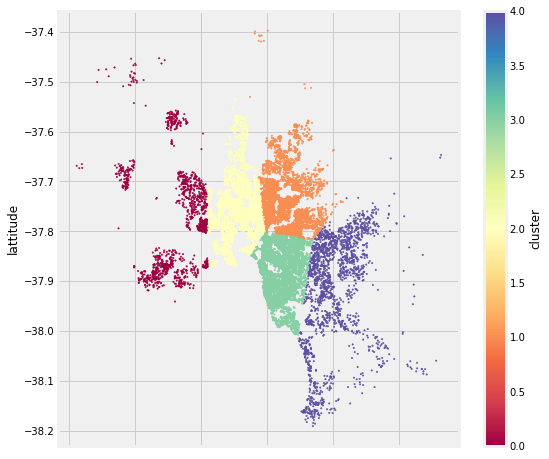

In [390]:
# dbscan = DBSCAN(eps = 0.6)
# dbscan.fit(mel[['price','lattitude', 'longtitude']])
km = KMeans(n_clusters=5, random_state=42)
km.fit(mel[['lattitude', 'longtitude']])
mel['cluster'] = km.labels_

mel.plot(
    kind='scatter',
    x='longtitude',
    y='lattitude',
    c='cluster',
    colormap='Spectral',
    s=2,
    figsize=(8, 8)
)

In [378]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<AxesSubplot:xlabel='longtitude', ylabel='lattitude'>

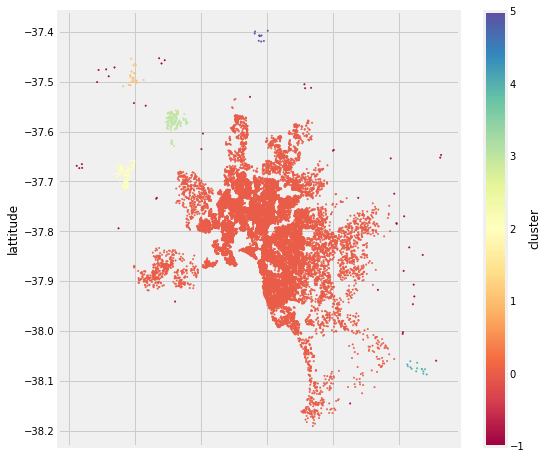

In [391]:
dbscan = DBSCAN(eps = 0.3, min_samples = 10)
dbscan.fit(scale_matrix(mel[['lattitude', 'longtitude']]))

mel['cluster'] = dbscan.labels_

mel.plot(
    kind='scatter',
    x='longtitude',
    y='lattitude',
    c='cluster',
    colormap='Spectral',
    s=2,
    figsize=(8, 8)
)

### 5f) Do prices differ by cluster?

<AxesSubplot:ylabel='cluster'>

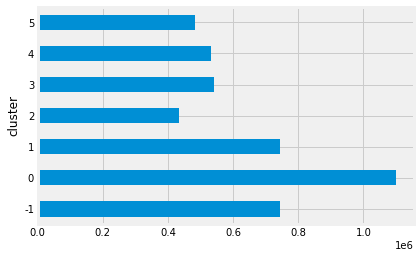

In [396]:
mel.groupby('cluster')['price'].mean().plot.barh()